# TITLE: Movie Recommendation system
## Collaborators
1. Ezra Kipchirchir
2. Sharon Kaliku
3. Mercy Tegekson
4. Robinson Mumo
5. Allen Maina
6. Candy Gudda

#### Repository link: https://github.com/dev-ezzy/Movie-Recommendation-System-.git

### Project Overview
Leveraging the MovieLens dataset, this recommendation system aims to provide users with a tailored movie-watching experience by combining the nuances of user preferences, movie characteristics, and demographic insights. The extensive nature of the dataset allows for a nuanced exploration of user interactions, capturing not only explicit ratings but also implicit user behaviors. With this comprehensive approach, the recommendation system can uncover hidden patterns and correlations, enhancing the precision and relevance of suggested movies. By delving into the intricate details of user demographics, the system aspires to cater to diverse tastes and preferences, ensuring a more inclusive and engaging cinematic journey for every user. In summary, the project sets out to harness the power of the MovieLens dataset to deliver a sophisticated and user-centric movie recommendation system that goes beyond conventional rating predictions, providing a more holistic and enjoyable viewing experience.
### Introduction
his is a recommendation system project tailored for the film industry, focusing on predicting and suggesting movies based on user preferences. Our machine learning model aims to provide personalized recommendations by analyzing historical user interactions with movies. The dataset utilized in this project is sourced from a renowned movie database, capturing user ratings, genres, and other relevant features.
In the film industry, where user preferences vary widely, our recommendation system leverages advanced machine learning techniques to predict movies that users are likely to enjoy. By employing collaborative filtering and content-based approaches, we strive to enhance the user experience by offering tailored suggestions for films that align with their tastes.
This project is driven by the goal of revolutionizing the movie-watching experience, providing users with a curated list of film recommendations. Whether a user enjoys action, drama, or comedy, our recommendation system is designed to cater to diverse tastes and preferences, contributing to a more engaging and enjoyable cinematic journey.
### Proposed solution
1. Collaborative Filtering:
User-Based Collaborative Filtering: Recommends items based on the preferences of users with similar tastes.
Item-Based Collaborative Filtering: Recommends items similar to those liked by the user.
2.Content-Based Filtering:
Utilizes information about the items themselves and recommends items with similar features to what the user has liked in the past.
Hybrid Approaches:
3.Combines collaborative and content-based methods to leverage the strengths of both approaches.
Matrix Factorization:
4. Decomposes the user-item interaction matrix into latent factors, capturing hidden patterns and relationships.
5. Deep Learning Models:
Neural network architectures, such as autoencoders and recurrent neural networks (RNNs), can learn complex patterns and relationships for improved recommendations.
## 2.0 BUSINESS UNDERSTANDING
#### 2.1Problem statement
In the dynamic landscape of movie recommendation systems, the central challenge transcends mere movie suggestions; it hinges on delivering an immersive and personalized cinematic journey for each user. Navigating through the expansive catalogue of films poses a substantial hurdle, as users grapple with the daunting task of sifting through genres, styles, and preferences to uncover hidden gems. This project aspires to be the guiding compass in this cinematic labyrinth, introducing a recommendation system meticulously crafted around the MovieLens dataset.

The overarching objective is not just to streamline movie recommendations but to redefine the user's relationship with cinematic exploration. The crux of the challenge lies in decoding individual tastes, and this project endeavors to unlock this puzzle through a sophisticated recommendation system. By delving into the intricate nuances of user ratings, the aim is to decipher the intricate tapestry of cinematic preferences.
#
#### 2.2 Audiences / Stakeholders
#
Our audiences and key stakeholders include:
1. End Users (Movie Enthusiasts):
These are individual users who seek movie recommendations for personal entertainment and they personalized and accurate movie suggestions to enhance their viewing experience.
2. Streaming Platforms:
These are companies providing online streaming services that host a vast catalog of movies and aim to increase user engagement, satisfaction, and retention by integrating an effective recommendation system.
3. Content Providers:
These are Studios, distributors, and filmmakers who contribute movies to streaming platforms and are interested in maximizing the visibility and viewership of their content through effective recommendations.
4. Business Decision Makers:
These are executives and managers of streaming platforms or related businesses who seek to understand the impact of the recommendation system on user metrics, such as retention and revenue.
#### 2.3 Objectives
Our objectives include:
Main/ Primary:
1. Build a model that provides top 5 movie recommendations to a user, based on their ratings of other movies.
#
Others:
1. To determine the highest rating score.
#
2. To analyse the trend of movie ratings over the years.
#
3. To analyse the top 5 rated genres.
### Data understanding
`movieId`: Identifier for a movie.
#
`title`: The title of the movie.
#
`genres`: The genres associated with the movie.
#
`userId_x`: User identifier from the first DataFrame.
#
`rating`: Rating given by a user for a particular movie.
#
`timestamp_x`: Timestamp of the rating from the first DataFrame.
#
`userId_y`: User identifier from the second DataFrame.
#
`tag`: Tag associated with a movie from the second DataFrame.
#
`timestamp_y`: Timestamp of the tag from the second DataFrame.
#
`imdbId`: IMDb ID is a unique identifier assigned to each title (movie, TV show, etc.) on IMDb
#
`tmdbId`: TMDb ID is a unique identifier assigned to each title (movie or TV show) on TMDb.
#### 1. Importing the required libraries and modules for our project

In [1]:
# importing data manipulation modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import sns_ycount, sns_xcount
from functools import reduce

#### 1.2 loading and doing the necessary inspection on our data

In [2]:
links = pd.read_csv("data/links.csv")
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [3]:
movies = pd.read_csv("data/movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
ratings = pd.read_csv("data/ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Key Insights from ratings_df:
#
Rating Range: Users have provided ratings in a range from 0.5 to 5.0, indicating diverse opinions about the movies.
#
Average Rating: The average rating across all movies is 3.5, suggesting that users, on average, tend to give moderate ratings.
#
User IDs: The dataset includes user IDs ranging from 1 to 610, representing a total of 610 unique users.
#
Movie IDs: Movie IDs span from 1 to 193609, with 193609 being the highest movie ID. Note that this represents the highest movie ID and not necessarily the total count of movies in the dataset.
#
These insights provide a foundational understanding of the dataset's characteristics and the user-movie interactions.

In [5]:
tags = pd.read_csv("data/tags.csv")
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


#### 1.2 Merging our four datasets into one dataframe 

In [6]:
# List of DataFrames to merge
dataframes = [movies, ratings, tags, links]

# Use reduce() and pd.merge() to merge the DataFrames
merged_data = reduce(
    lambda left, right: pd.merge(left, right, on="movieId"), dataframes
)
# inspecting the first five rows
merged_data.head()

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825,114709,862.0


In [7]:
merged_data["timestamp_x"].dtype

dtype('int64')

Changing rating timestamp and tag timestamp to human readable format for easy analysis

In [8]:
# importing datetime
from datetime import datetime

# using utcfromtimestamp method from datetime module to convert timestamps to human readable format
merged_data["rating_timestamp"] = merged_data["timestamp_x"].apply(
    lambda x: datetime.utcfromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S")
)
merged_data["tag_timestamp"] = merged_data["timestamp_y"].apply(
    lambda x: datetime.utcfromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S")
)
# changing the timestamps to pandas datetime objects
merged_data["rating_timestamp"] = pd.to_datetime(merged_data["rating_timestamp"])
merged_data["tag_timestamp"] = pd.to_datetime(merged_data["tag_timestamp"])
merged_data.drop(columns=["timestamp_x", "timestamp_y"], axis=1, inplace=True)
merged_data.head()

,movieId,title,genres,userId_x,rating,userId_y,tag,imdbId,tmdbId,rating_timestamp,tag_timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,336,pixar,114709,862.0,2000-07-30 18:45:03,2006-02-04 09:36:04
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,474,pixar,114709,862.0,2000-07-30 18:45:03,2006-01-14 02:47:05
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,567,fun,114709,862.0,2000-07-30 18:45:03,2018-05-02 18:33:33
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,336,pixar,114709,862.0,1996-11-08 06:36:02,2006-02-04 09:36:04
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,474,pixar,114709,862.0,1996-11-08 06:36:02,2006-01-14 02:47:05


In [9]:
# info
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233213 entries, 0 to 233212
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   movieId           233213 non-null  int64         
 1   title             233213 non-null  object        
 2   genres            233213 non-null  object        
 3   userId_x          233213 non-null  int64         
 4   rating            233213 non-null  float64       
 5   userId_y          233213 non-null  int64         
 6   tag               233213 non-null  object        
 7   imdbId            233213 non-null  int64         
 8   tmdbId            233213 non-null  float64       
 9   rating_timestamp  233213 non-null  datetime64[ns]
 10  tag_timestamp     233213 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)
memory usage: 19.6+ MB


Our data seems to have no null values nor missing data
#
We will go ahed and do summary statistics for our numerical columns

In [10]:
# summary statistics
merged_data.describe()

,movieId,userId_x,rating,userId_y,imdbId,tmdbId,rating_timestamp,tag_timestamp
count,233213.000000,233213.000000,233213.000000,233213.000000,2.332130e+05,233213.000000,233213,233213
mean,12319.999443,309.688191,3.966535,470.683564,2.610632e+05,9378.277742,2008-06-15 10:00:05.688053504,2013-11-18 11:23:32.147153152
min,1.000000,1.000000,0.500000,2.000000,1.234900e+04,11.000000,1996-03-29 18:36:55,2006-01-13 19:09:12
25%,296.000000,156.000000,3.500000,424.000000,1.103570e+05,278.000000,2002-03-29 01:16:06,2009-05-16 17:18:24
50%,1198.000000,309.000000,4.000000,477.000000,1.109120e+05,680.000000,2008-07-29 09:45:57,2016-03-13 20:34:05
75%,4638.000000,460.000000,5.000000,599.000000,1.724950e+05,1892.000000,2015-09-25 17:11:10,2017-06-26 05:56:57
max,193565.000000,610.000000,5.000000,610.000000,5.580390e+06,503475.000000,2018-09-24 14:27:30,2018-09-16 11:50:03
std,28243.919401,178.206387,0.968637,153.329632,4.414411e+05,36943.139800,NaN,NaN


### 2. Exploratory Data Analysis
Now that our data is clean and ready for use, we are going to visualize our data. Plotting graphs and visuals is the main thing we are doing here in order to further understand visually what our data is communicating. We will tools such as `seaborn` and `matplotlib`
#
#### 2.1 Univariate analysis


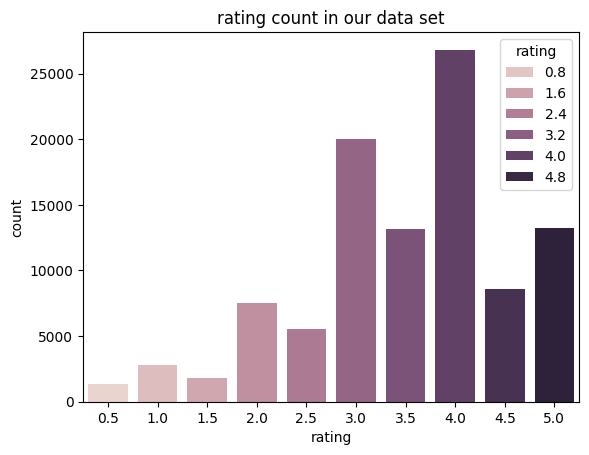

In [11]:
sns_xcount("rating", ratings)

Rating has 0.5 as the smallest value and 5.0 as the biggest. Rating 4.0 and rating 5.0 both have the highest number of count
#
Below we visually inspect the top 50 movie tags in our data

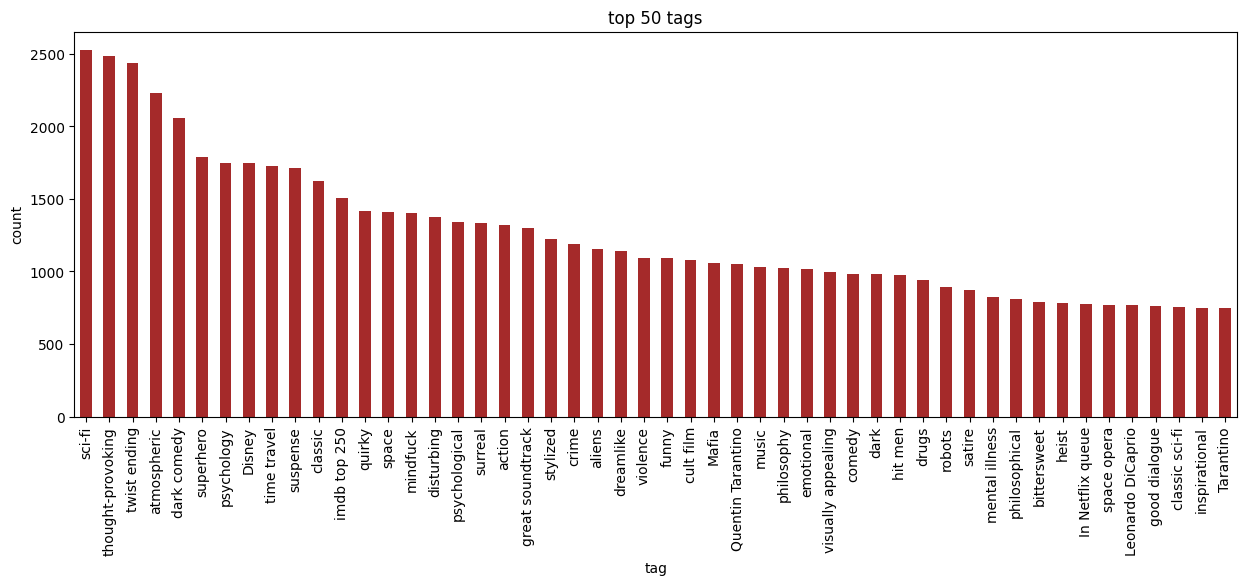

In [12]:
# plotting top 50 tags barplot using matplotlib
fig, ax = plt.subplots(figsize=(15, 5))
merged_data["tag"].value_counts().head(50).plot(kind="bar", color="brown")
plt.title("top 50 tags")
plt.xlabel("tag")
plt.ylabel("count")
plt.show()

Next we are also going to visualize the movie genres in our dataset

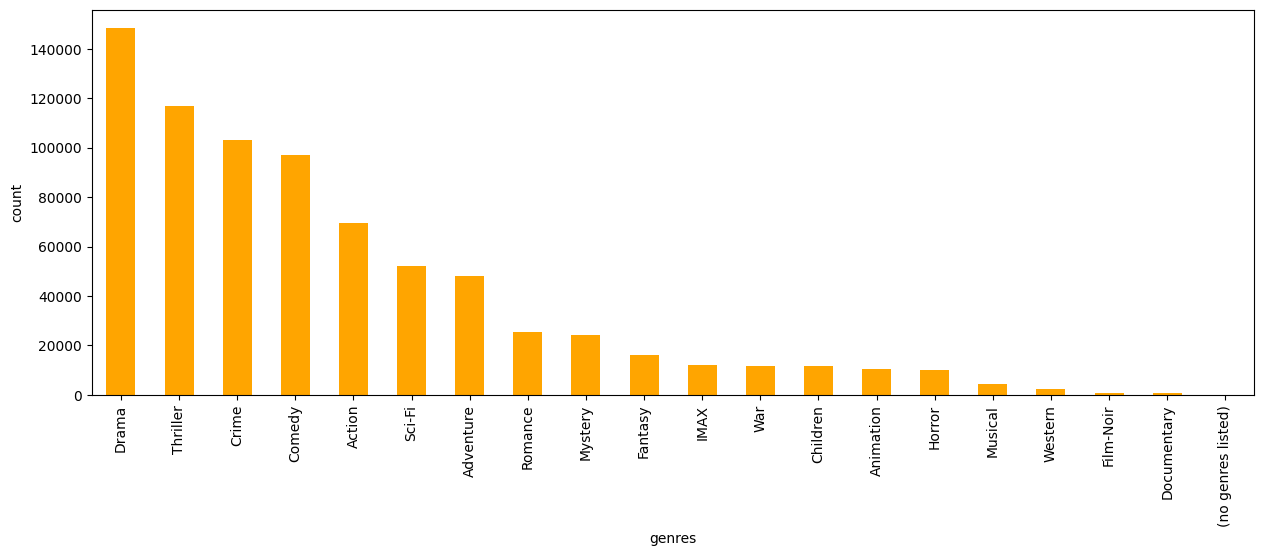

In [13]:
# getting each count of unique genre
genre_to_plot = merged_data["genres"].str.split("|", expand=True).stack().value_counts()
# plotting a barplot using matplotlib
fig, ax = plt.subplots(figsize=(15, 5))
genre_to_plot.plot(kind="bar", color="orange")
sns.countplot()
plt.xlabel("genres")
plt.ylabel("count")
plt.show()

#### Top Watched Movies

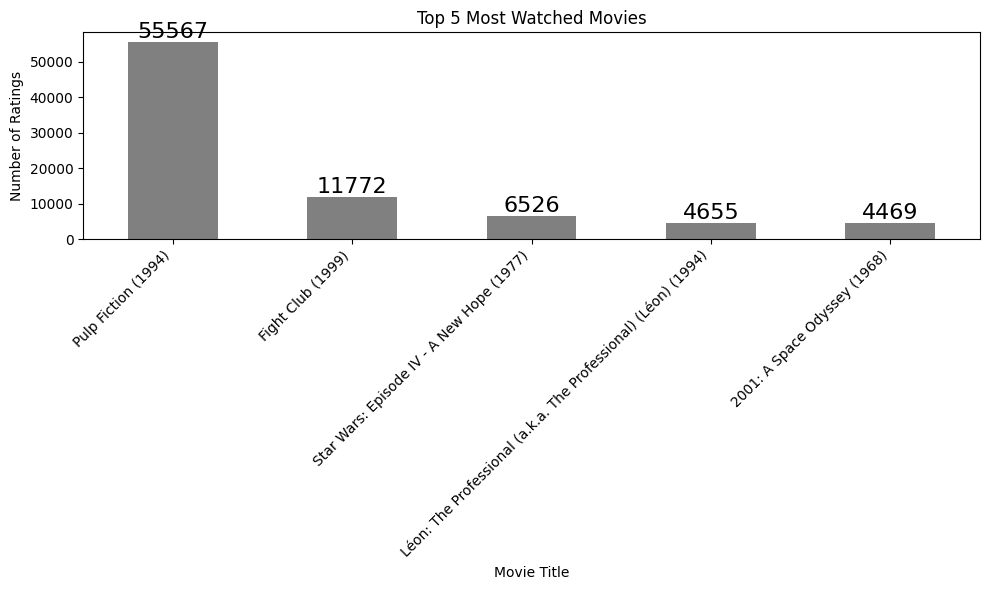

In [14]:
# Group by movie title and count the number of ratings, then sort in descending order
top_watched_movies = (
    merged_data.groupby("title")["rating"].count().sort_values(ascending=False).head()
)
# bar plots with custom colors
plt.figure(figsize=(10, 6))
ax = top_watched_movies.plot(kind="bar", color="grey")
plt.title("Top 5 Most Watched Movies")
plt.xlabel("Movie Title")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Add the number of ratings on top of each bar
for i, v in enumerate(top_watched_movies):
    ax.text(i, v, str(v), ha="center", va="bottom", fontsize=16, color="black")

plt.show()

#### 2.2 Bivariate exploratory analysis
#
Visualizing the trend of ratings yearly over the years

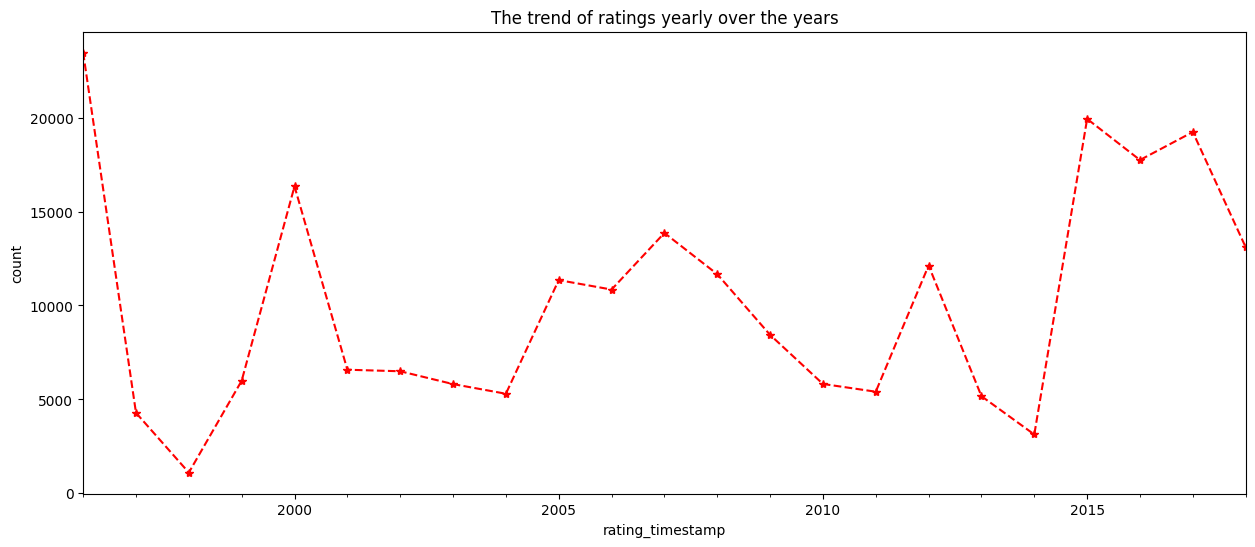

In [15]:
# set rating_timestamp as the index
trends_data = merged_data.set_index("rating_timestamp")
# yearly resampling
yearly_trend = trends_data.resample("Y").size()
# plotting the trend
plt.figure(figsize=(15, 6))
yearly_trend.plot(marker="*", linestyle="--", color="red")
plt.title("The trend of ratings yearly over the years")
plt.xlabel("rating_timestamp")
plt.ylabel("count")
plt.show()

Visualizing the trend of movie tagging

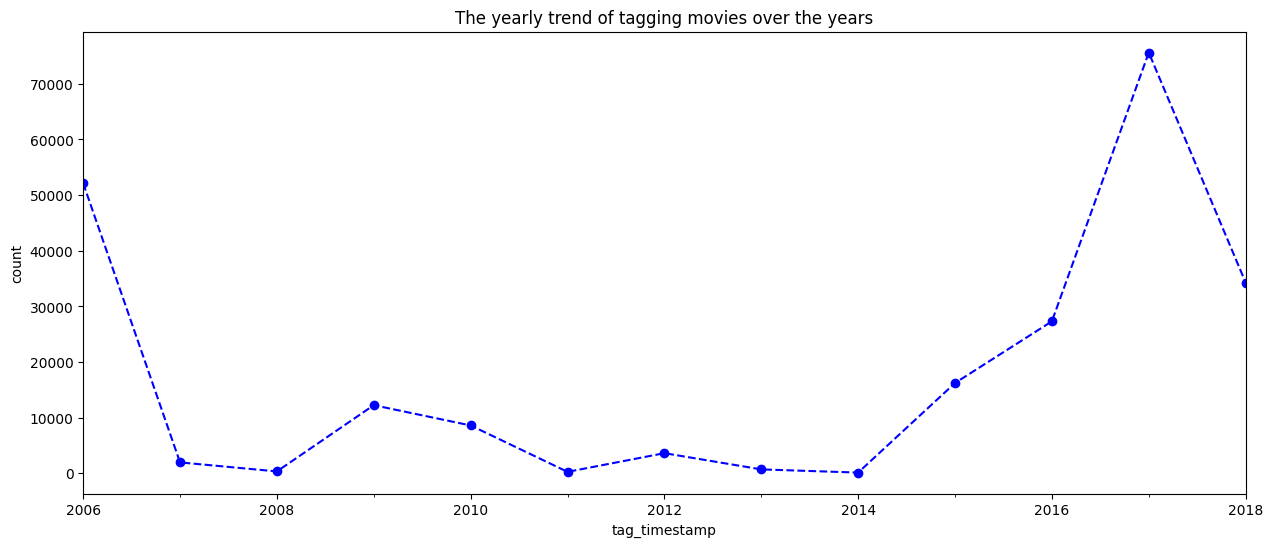

In [16]:
# set tag_timestamp as the index
tag_data = merged_data.set_index("tag_timestamp")
# yearly resampling
yearly_trend = tag_data.resample("Y").size()
# plotting the trend
plt.figure(figsize=(15, 6))
yearly_trend.plot(marker="o", linestyle="--", color="blue")
plt.title("The yearly trend of tagging movies over the years")
plt.xlabel("tag_timestamp")
plt.ylabel("count")
plt.show()

Checking the Distribution of our numerical columns

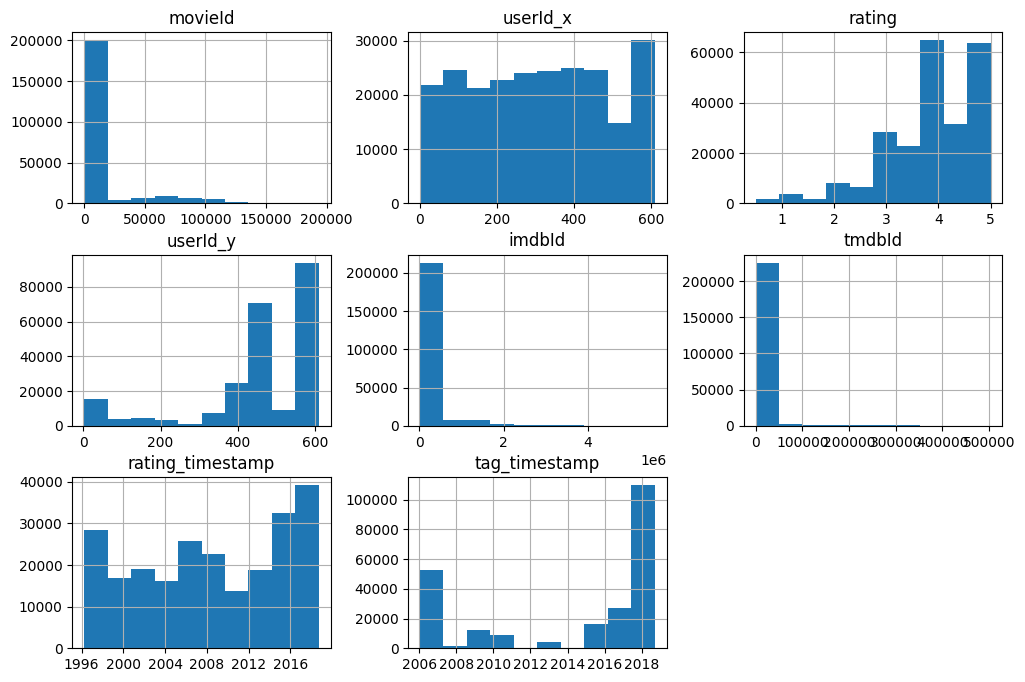

In [17]:
# Visualize data distributions
merged_data.hist(figsize=(12, 8))
plt.show()

### 3. Modelling
#
In the context of recommender systems, modeling refers to the process of creating mathematical or computational representations that capture user preferences, item characteristics, and the interactions between users and items. The goal is to develop models that can make accurate predictions or generate personalized recommendations based on historical data.
#
For modelling purposes we will only use two datasets from the four available, that is, `movies` and `ratings` dataset. Below we merge the two dataframes so we can start our modelling.



In [18]:
# merging the two dataframes
modelling_data = pd.merge(movies, ratings, on="movieId")
# dropping timestamp
modelling_data.drop(columns="timestamp", axis=1, inplace=True)
modelling_data

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5
...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5
100833,193585,Flint (2017),Drama,184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5


#### 3.1 Baseline model (Single Value Decomposition)
#
This is a model that uses collaborative filtering to make automatic predictions about the interests of a user by collecting preference and taste information from many users. In SVD we turn recommendation problem into an optimization problem that deals with how good we are in predicting the rating for items given a user
#
Metric used to achieve optimisation is root mean squared error (RMSE)

In [19]:
# importing necessary modules
from surprise.prediction_algorithms import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# choosing data to use
baseline_data = modelling_data[["movieId", "userId", "rating"]]
# defining format of the input data
reader = Reader(rating_scale=(0.5, 5.0))

dataset = Dataset.load_from_df(baseline_data[["userId", "movieId", "rating"]], reader)
# splitting data into train and test set
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=42)

# instantiating the SVD model
base_model = SVD()
# fitting the trainset
base_model.fit(train_data)
# prediction on the test data
test_pred = base_model.test(test_data)
# rmse score for testset
print(f"rmse score is : {accuracy.rmse(test_pred)}")
print(f"mae score is : {accuracy.mae(test_pred)}")

RMSE: 0.8778
rmse score is : 0.8778056653346794
MAE:  0.6752
mae score is : 0.6752225985131998


Our model has an rmse score of almost 0.88. This is  not a bad model for a start, we will go ahead and use it to make recommendations using it to a user. We will select a userId and number of recommendations we want the system to recommend. Before that we will remove the items that the unique user has rated

In [20]:
# using a function to print the recommended movie and its atrributes
from recommender import recommender_system

recommender_system(509, 5, baseline_data, base_model)

MovieId: 318, Title: Shawshank Redemption, The (1994), Genres: Crime|Drama, Estimated Rating: 4.277520367358179
MovieId: 750, Title: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Genres: Comedy|War, Estimated Rating: 4.203508248470682
MovieId: 1204, Title: Lawrence of Arabia (1962), Genres: Adventure|Drama|War, Estimated Rating: 4.190313178160595
MovieId: 356, Title: Forrest Gump (1994), Genres: Comedy|Drama|Romance|War, Estimated Rating: 4.175486965532753
MovieId: 2959, Title: Fight Club (1999), Genres: Action|Crime|Drama|Thriller, Estimated Rating: 4.140745486121778


We will try to define many parameters for our SVD model and see if it improves or not. GridsearchCV from `suprise` module will help use in findng the best parameters to use on our model. We shall use the RMSE score to compare the performance of the two models.

In [21]:
# importing gridsearch CV from surprise
from surprise.model_selection import GridSearchCV

# setting up the parameter grid
grid = {
    "n_factors": [20, 50, 100],
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.01, 0.02, 0.005],
    "reg_all": [0.2, 0.3, 0.4, 0.6],
}
grid_model = GridSearchCV(SVD, param_grid=grid, n_jobs=-1, joblib_verbose=5)
grid_model.fit(dataset)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  2.0min finished


In [22]:
# best parameters
print(f"The best parameters from the grid are\n {grid_model.best_params}")

The best parameters from the grid are
 {'rmse': {'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.02, 'reg_all': 0.2}, 'mae': {'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.02, 'reg_all': 0.2}}


From the GridsearchCv results the best parameters to optimize our model are as stated above. We will use these values and pass it tour model to see if the rmse score will reduce

In [23]:
best_params_model = SVD(n_factors=100, n_epochs=10, lr_all=0.01, reg_all=0.2)
# fitting training set
best_params_model.fit(train_data)
# predictions for test set
best_preds = best_params_model.test(test_data)
# rmse score
print(f"The rmse score of tuned svd is : {accuracy.rmse(best_preds)}")
print(f"The mae score of tuned svd is : {accuracy.mae(best_preds)}")

RMSE: 0.8749
The rmse score of tuned svd is : 0.8748977830062478
MAE:  0.6755
The mae score of tuned svd is : 0.675495472219488


Our tuned model seems to work slightly better than the vanilla version. This is a good indication that tuning improved the performance but the change was significantly minimal. We will go ahead and used the tuned model to make some recommendations to a user

In [24]:
recommender_system(509, 5, baseline_data, best_params_model)

MovieId: 1204, Title: Lawrence of Arabia (1962), Genres: Adventure|Drama|War, Estimated Rating: 4.048546529922832
MovieId: 750, Title: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Genres: Comedy|War, Estimated Rating: 4.0064080103858055
MovieId: 318, Title: Shawshank Redemption, The (1994), Genres: Crime|Drama, Estimated Rating: 3.9708604306320145
MovieId: 1104, Title: Streetcar Named Desire, A (1951), Genres: Drama, Estimated Rating: 3.9531196443497647
MovieId: 246, Title: Hoop Dreams (1994), Genres: Documentary, Estimated Rating: 3.947068937302463


#### 3.2 KNN
The K-Nearest Neighbors (KNN) algorithm is a simple and intuitive algorithm used for both classification and regression tasks. The fundamental idea behind KNN is to make predictions based on the majority class (for classification) or the average value (for regression) of the K training examples that are closest to the new input data point. Since this is regression like problem we will mainly focus on the average of the K

In [25]:
# Drop rows with missing values in the 'title' column
combine_movie_rating = modelling_data.dropna(axis=0, subset=["title"])

# Group the DataFrame by 'title', count the number of ratings for each movie, and reset the index
movie_ratingCount = (
    combine_movie_rating.groupby(by=["title"])["rating"]
    .count()
    .reset_index()
    .rename(columns={"rating": "totalRatingCount"})[["title", "totalRatingCount"]]
)
# Merging DataFrames: combine_movie_rating and movie_ratingCount
rating_with_totalRatingCount = combine_movie_rating.merge(
    movie_ratingCount, left_on="title", right_on="title", how="left"
)
rating_with_totalRatingCount.head(3)

,movieId,title,genres,userId,rating,totalRatingCount
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,215


In [26]:
# Format floating-point numbers in the output with three decimal places.
pd.set_option("display.float_format", lambda x: "%.3f" % x)
print(movie_ratingCount["totalRatingCount"].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


Filter the DataFrame rating_with_totalRatingCount based the condition is specified. It selects rows where the 'totalRatingCount' column is greater than or equal to the value stored in the popularity_threshold variable.

In [27]:
# Set popularity threshhold
popularity_threshold = 50

rating_popular_movie = rating_with_totalRatingCount.query(
    "totalRatingCount >= @popularity_threshold"
)
rating_popular_movie.head()

,movieId,title,genres,userId,rating,totalRatingCount
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.000,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.000,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.500,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.500,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.500,215


In [28]:
# shape of our popular movies
rating_popular_movie.shape

(41362, 6)

#### Creating a pivot matrix
A pivot matrix provides an organized way to represent this sparse data. Most entries in the matrix will be empty (NaN or zero) since users haven't interacted with most items. The sparse nature of the matrix helps us solve the cold start problem

In [29]:
# create a Pivot matrix
movie_features_df = modelling_data.pivot_table(
    index="title", columns="userId", values="rating"
).fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
'Hellboy': The Seeds of Creation (2004),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Round Midnight (1986),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Salem's Lot (2004),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Til There Was You (1997),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


#### Working with k-nearest neighbors algorithm.
Here we are going to implement our KNN algorithm and fit our training data on it. After that we are going to evaluate it and check if its rmse score is is better or worse compared to other models

In [30]:
from surprise import KNNBasic, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import Reader, Dataset

# Load the dataset from the dataframe
data = modelling_data[["movieId", "userId", "genres", "rating"]]
reader = Reader(rating_scale=(0.5, 5.0))
dataset = Dataset.load_from_df(data[["movieId", "userId", "rating"]], reader)

# Split the data into training and testing sets
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=10)
# Create KNNBasic model
knn_model = KNNBasic()

# Train the model on the training set
knn_model.fit(train_data)

# Make predictions on the test set
predictions = knn_model.test(test_data)

# Evaluate the model's performance

print(f"RMSE on test set for knn model: {accuracy.rmse(predictions)}")
print(f"MAE on the test set for knn model: {accuracy.mae(predictions)}")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9098
RMSE on test set for knn model: 0.9097980178948784
MAE:  0.7017
MAE on the test set for knn model: 0.7016890917147729


We will use GridSearchCV to look for the best parameters to tune our basic model to see if it improves or not

In [31]:
# Define the parameter grid for grid search
param_grid = {
    "k": [20, 30, 40],
    "sim_options": {"name": ["cosine", "pearson"], "user_based": [False]},
}

# Create an instance of the KNNBASIC algorithm
knn_model = KNNBasic()

# Create GridSearchCV object
grid_search = GridSearchCV(KNNBasic, param_grid, measures=["RMSE"], cv=5)

# Fit the grid search object to the data
grid_search.fit(dataset)

# Get the best parameters from the grid search
best_params = grid_search.best_params["rmse"]
best_score = grid_search.best_score["rmse"]


# Build the k-NN with Neigbours collaborative filtering model with the best parameters
knn_model = KNNBasic(k=best_params["k"], sim_options=best_params["sim_options"])

# Train the model on the training set
knn_model.fit(train_data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computi

The RMSE value calculated for the model on the test set is approximately 0.9715.

In [46]:
from recommender2 import knn_recommender

knn_recommender(5, knn_model, 5)

Movie: Lamerica (1994), Predicted Rating: 4.4
Movie: Hunted, The (1995), Predicted Rating: 4.3
Movie: Leaving Las Vegas (1995), Predicted Rating: 4.3
Movie: Shanghai Triad (Yao a yao yao dao waipo qiao) (1995), Predicted Rating: 4.2
Movie: Ruby in Paradise (1993), Predicted Rating: 4.2


### 3.3 KNNWithmeans
This almost the same thing as the basic KNN model except it takes into account the mean rating of each user or item depending on whether you are performing user-user or item-item similarities

In [33]:
# Make a copy of the original utility matrix
item_utility_matrix = movie_features_df.copy()

# Display the first 10 rows of the item utility matrix
item_utility_matrix.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
'Hellboy': The Seeds of Creation (2004),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Round Midnight (1986),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Salem's Lot (2004),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Til There Was You (1997),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Tis the Season for Love (2015),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"'burbs, The (1989)",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'night Mother (1986),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
(500) Days of Summer (2009),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500


In [34]:
from surprise import KNNWithMeans
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import Reader, Dataset

# Load the dataset from the dataframe
data = modelling_data[["movieId", "userId", "genres", "rating"]]
reader = Reader(rating_scale=(0.5, 5.0))
dataset = Dataset.load_from_df(data[["movieId", "userId", "rating"]], reader)

# Split the data into training and testing sets
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=4)
# Create KNNWithMeans model
knn_model = KNNWithMeans()

# Train the model on the training set
knn_model.fit(train_data)

# Make predictions on the test set
knnmeans_predictions = knn_model.test(test_data)

# Evaluate the model's performance
print(f"RMSE on test set for knn model: {accuracy.rmse(knnmeans_predictions)}")
print(f"MAE on test set: {accuracy.mae(knnmeans_predictions)}")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8914
RMSE on test set for knn model: 0.8913765181536418
MAE:  0.6812
MAE on test set: 0.681241689428374


In [35]:
# Load the dataset from the dataframe
data = modelling_data[["movieId", "userId", "genres", "rating"]]
reader = Reader(rating_scale=(0.5, 5.0))
dataset = Dataset.load_from_df(data[["movieId", "userId", "rating"]], reader)

# Split the data into training and testing sets
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=4)

# Define the parameter grid for grid search
param_grid = {
    "k": [20, 30, 40],  # Adjust these values based on your preference
    "sim_options": {"name": ["cosine", "pearson"], "user_based": [False]},
}

# Create an instance of the KNNWithMeans algorithm
knn_model = KNNWithMeans()

# Create GridSearchCV object
grid_search = GridSearchCV(KNNWithMeans, param_grid, measures=["RMSE"], cv=3)

# Fit the grid search object to the data
grid_search.fit(dataset)

# Get the best parameters from the grid search
best_params = grid_search.best_params["rmse"]
best_score = grid_search.best_score["rmse"]


# Build the k-NN with means collaborative filtering model with the best parameters
knn_model = KNNWithMeans(k=best_params["k"], sim_options=best_params["sim_options"])

# Train the model on the training set
knn_model.fit(train_data)

# Make predictions on the test set
knnmeans_tuned_predictions = knn_model.test(test_data)

# Evaluate the model's performance
print(f"Best RMSE Score: {best_score}")
print(f"Best Parameters: {best_params}")
print(f"RMSE on test set: {accuracy.rmse(knnmeans_tuned_predictions)}")
print(f"MAE on test set: {accuracy.mae(knnmeans_tuned_predictions)}")

from surprise.model_selection import cross_validate

# cv_knn_basic = cross_validate(knn_model, dataset, n_jobs=-1)
cv_results = cross_validate(knn_model, dataset, measures=["RMSE"], cv=5, verbose=True)

np.mean(cv_results["test_rmse"])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Comput

0.8996622369068603

In [36]:
# Use cross_validate with the Surprise Dataset
from surprise.model_selection import cross_validate

# cv_knn_basic = cross_validate(knn_model, data45set, n_jobs=-1)
cv_results = cross_validate(
    knn_model, dataset, measures=["RMSE", "MAE"], cv=5, verbose=True
)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8999  0.9050  0.9083  0.8943  0.8981  0.9011  0.0050  
MAE (testset)     0.6885  0.6912  0.6960  0.6842  0.6876  0.6895  0.0039  
Fit time          0.27    0.25    0.25    0.26    0.27    0.26    0.01    
Test time         1.45    1.53    1.30    1.47    1.41    1.43    0.07    


## Making Recommendations

In [42]:
from recommender3 import knn_recommender

knn_recommender(5, knn_model, 5)

Movie: Lamerica (1994), Predicted Rating: 4.4
Movie: Hunted, The (1995), Predicted Rating: 4.3
Movie: Leaving Las Vegas (1995), Predicted Rating: 4.3
Movie: Shanghai Triad (Yao a yao yao dao waipo qiao) (1995), Predicted Rating: 4.2
Movie: Ruby in Paradise (1993), Predicted Rating: 4.2


#### 3.4 Tensorflow Recommenders 

TensorFlow Recommenders simplifies the creation of recommender systems by offering high-level abstractions and pre-built components. Leveraging TensorFlow's ecosystem, it includes specialized embedding layers for users and items, retrieval models for efficient candidate generation, and common loss functions for training. With a modular and example-based API, users can easily customize and extend models for various recommendation tasks, making it a flexible and powerful tool in building accurate and scalable recommender systems.

In [48]:
# importing necessary modules
import tensorflow as tf
import tensorflow_recommenders as tfrs

# Map user and movie IDs to unique integer indices
user_mapping = {id: idx for idx, id in enumerate(modelling_data["userId"].unique())}
movie_mapping = {id: idx for idx, id in enumerate(modelling_data["movieId"].unique())}

modelling_data["user_idx"] = modelling_data["userId"].map(user_mapping)
modelling_data["movie_idx"] = modelling_data["movieId"].map(movie_mapping)

# Create user and movie feature tensors
user_features = tf.convert_to_tensor(modelling_data["user_idx"], dtype=tf.int32)
movie_features = tf.convert_to_tensor(modelling_data["movie_idx"], dtype=tf.int32)
ratings = tf.convert_to_tensor(modelling_data["rating"], dtype=tf.float32)


# # Define the model
class TfrsModel(tfrs.Model):
    def __init__(self, user_model, movie_model):
        super().__init__()
        self.movie_model: tf.keras.Model = movie_model
        self.user_model: tf.keras.Model = user_model
        self.task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
            loss=tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError()],
        )

    def compute_loss(self, features, training=False):
        user_embeddings = self.user_model(features[0]["user_idx"][:, None])
        movie_embeddings = self.movie_model(features[0]["movie_idx"][:, None])

        return self.task(user_embeddings, movie_embeddings)

    def call(self, features, training=False):
        user_embeddings = self.user_model(features["user_idx"][:, None])
        movie_embeddings = self.movie_model(features["movie_idx"][:, None])

        return self.task(user_embeddings, movie_embeddings)


# Create user and movie embedding layers using Embedding
user_model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(
            input_dim=len(user_mapping),
            output_dim=32,
            input_length=1,  # Add input_length
        ),
        # Add more layers as needed
    ]
)

movie_model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(
            input_dim=len(movie_mapping),
            output_dim=32,
            input_length=1,  # Add input_length
        ),
        # Add more layers as needed
    ]
)


# Initialize and compile the model
tsfr_model = TfrsModel(user_model, movie_model)
tsfr_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))


# Train the model
tsfr_model.fit(
    x={"user_idx": user_features, "movie_idx": movie_features}, y=ratings, epochs=5
)

# Define a sample input shape based on your actual data
sample_input_shape = {"user_idx": (None, 1), "movie_idx": (None, 1)}

# Build the model with the specified input shape
tsfr_model.build(input_shape=sample_input_shape)

Epoch 1/5
3152/3152 [==============================] - 18s 6ms/step - root_mean_squared_error: 0.7585 - loss: 0.5752 - regularization_loss: 0.0000e+00 - total_loss: 0.5752
Epoch 2/5
3152/3152 [==============================] - 18s 6ms/step - root_mean_squared_error: 0.8829 - loss: 0.7792 - regularization_loss: 0.0000e+00 - total_loss: 0.7792
Epoch 3/5
3152/3152 [==============================] - 17s 6ms/step - root_mean_squared_error: 0.7495 - loss: 0.5617 - regularization_loss: 0.0000e+00 - total_loss: 0.5617
Epoch 4/5
3152/3152 [==============================] - 17s 5ms/step - root_mean_squared_error: 0.7948 - loss: 0.6315 - regularization_loss: 0.0000e+00 - total_loss: 0.6315
Epoch 5/5
3152/3152 [==============================] - 17s 5ms/step - root_mean_squared_error: 0.8089 - loss: 0.6545 - regularization_loss: 0.0000e+00 - total_loss: 0.6545


In [49]:
def get_top_movie_predictions(user, user_mapping, movie_mapping, model, df):
    # Get the user index for the given user ID
    user_idx = user_mapping[user]

    # Create user feature tensor for the given user
    user_feature = tf.convert_to_tensor([user_idx], dtype=tf.int32)

    # Generate movie indices for all movies
    all_movie_indices = tf.range(len(movie_mapping), dtype=tf.int32)

    # Tile the user index to match the number of movies
    user_feature_tiled = tf.tile(user_feature, [len(movie_mapping)])

    # Create movie feature tensor for all movies
    movie_features_all = tf.convert_to_tensor(all_movie_indices, dtype=tf.int32)

    # Predict ratings for all movies
    predicted_ratings = model.predict(
        x={"user_idx": user_feature_tiled, "movie_idx": movie_features_all}
    )

    # Get the top 5 movie indices based on predicted ratings
    top5_movie_indices = np.argsort(predicted_ratings)[-5:][::-1]

    # Map movie indices back to movie IDs
    top5_movie_ids = [
        key for key, value in movie_mapping.items() if value in top5_movie_indices
    ]

    # Fetch and print details for the top 5 predicted movies
    for item in top5_movie_ids:
        movie_data = df[df["movieId"] == item]
        title = movie_data["title"].values[0]
        genres = movie_data["genres"].values[0]
        # Add any other columns you want to retrieve
        print(
            f"Recommendations for user {user} are: ....\n",
        )
        print(f"Movie Id: {item}, Title: {title}, Genres: {genres}")

In [50]:
user = int(input("Enter user Id: "))
get_top_movie_predictions(user, user_mapping, movie_mapping, tsfr_model, modelling_data)

304/304 [==============================] - 1s 2ms/step
Recommendations for user 56 are: ....

Movie Id: 326, Title: To Live (Huozhe) (1994), Genres: Drama
Recommendations for user 56 are: ....

Movie Id: 328, Title: Tales from the Crypt Presents: Demon Knight (1995), Genres: Horror|Thriller
Recommendations for user 56 are: ....

Movie Id: 335, Title: Underneath (1995), Genres: Mystery|Thriller
Recommendations for user 56 are: ....

Movie Id: 341, Title: Double Happiness (1994), Genres: Drama
Recommendations for user 56 are: ....

Movie Id: 343, Title: Baby-Sitters Club, The (1995), Genres: Children


### Final model
We evaluated my models using the root mean squared error(RMSE) and mean absoute error(MAE) to determine the best performing model. We chose to use both RMSE and MAE to evaluate the recommender system because RMSE helps capture the overall accuracy by considering the squared differences, which can be crucial for penalizing larger deviations.
#
On the other hand, MAE provides insights into the average magnitude of errors, offering a more robust measure that is less sensitive to outliers. Utilizing both metrics ensures a comprehensive assessment of the model's performance, considering both accuracy and robustness
#### Best model
After a meticulous and iterative process of training and testing various machine learning models, we have identified the top-performing model among the contenders. The chosen model demonstrates robust performance on unseen data, minimizing the risk of false positive predictions when deployed to address real-world challenges. This rigorous model selection process involved a comprehensive evaluation of different algorithms and hyperparameter configurations. The chosen model not only excelled in accuracy but also exhibited resilience in handling unforeseen data patterns. This emphasis on generalizability positions our solution for effective deployment in real-world scenarios, where reliable and accurate predictions are paramount. 
## Tensorflow_recommenders
This machine learning movie recommendation system emerged the best having achieved an RMSE (Root Mean Square Error) of 0.75 and a loss of 0.52. These metrics were the best compared to the other models we implemented. A lower RMSE values indicate better predictive performance in this case our RMSE of 0.75 suggests that, on average, our model's predictions are off by approximately 0.75 units on the rating scale.
#
On the other hand loss is a measure of how well your model is able to minimize the difference between predicted and actual ratings during training. It is a value that the model aims to minimize.In the case of 0.52 loss, lower values are generally better, indicating that our model has learned to make better predictions on the training data.
#
We will go ahead and save our final model and use streamlit to productionalize our model. In simple term we means we want deploy it

In [68]:
# import joblib and streamlit
import streamlit as st
import joblib

# Save the model to a file
joblib.dump(TfrsModel, "best_recommender.joblib")
# app.py

# Load your trained model
deploy = joblib.load("best_recommender.joblib")

# Streamlit app
st.title("Movie recommender")

# Add user input components (e.g., sliders, text input)
user_input = st.text_input("What is your rating for this movie:")

if st.button("Get Recommendations"):
    user = get_top_movie_predictions(
        user, user_mapping, movie_mapping, tsfr_model, modelling_data
    )

This is the end of our model training, validation and testing. Machine learning models are the best to use because of many reasons but i will mention few;

1. Robust Predictive Abilities: Well-trained and validated machine learning models showcase robust predictive capabilities, accurately foreseeing trends or outcomes in new, unseen data. This proficiency becomes particularly valuable for forecasting future developments with confidence and precision.

2. Unraveling Intricate Patterns: Machine learning demonstrates exceptional proficiency in unraveling intricate patterns and unveiling nuanced relationships within datasets. Its capacity extends beyond conventional methodologies, enabling the detection of non-linear dependencies and subtle interactions among variables that may elude simpler analytical approaches.

3. Efficient Scaling Capabilities: Machine learning models exhibit remarkable efficiency in managing extensive datasets, effortlessly scaling to accommodate growing data volumes. This capability ensures their adaptability to analyze massive datasets, a task that could pose challenges for traditional analytical methods.

4. Adaptability and Flexibility: Machine learning models exhibit a remarkable ability to adapt to evolving data patterns. Their inherent flexibility allows seamless accommodation of diverse data types and structures, eliminating the need for frequent manual adjustments.


### Challenges
1. Low computational power to build the models and this affected testing and evaluating process as the process of building took so long. to also slowed down our project and limited the number of algorithms we could have build

2. Sparse Data: Recommendation systems often deal with sparse matrices, where many user-item interactions are missing. Dealing with sparse data can lead to challenges in accurately capturing user preferences.

3. Cold start problem: Recommender systems may struggle when dealing with new users or items that have limited or no historical interaction data. Here we employed strategies like content-based recommendations or hybrid models to address this.

4. Selecting the Right Metrics: Selecting appropriate evaluation metrics is crucial. Metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or precision and recall may not capture the overall performance accurately. Domain-specific metrics may be required.

5. Model Interpretability: Many recommendation models, especially deep learning models, are considered "black boxes." It can be challenging to explain recommendations to users or stakeholders. Balancing model accuracy with interpretability is a constant challenge.


### Conclusions
In conclusion, developing robust recommender systems is a pivotal opportunity to enhance user experience and engagement across various domains. Leveraging predictive models in recommendation algorithms enables platforms to proactively tailor content or suggestions, optimizing user satisfaction and maximizing interaction. By utilizing historical user preferences, item characteristics, and feedback data, these models empower stakeholders to anticipate user needs, prioritize personalized recommendations, and foster a more engaging and tailored experience. This predictive capability, combined with ongoing user feedback and iterative improvements, sets the stage for a comprehensive approach to recommendation system management, enhancing the quality of recommendations and ensuring sustained user satisfaction in diverse contexts.

### Recommendation
1. Regular Data collection: Ensure continuous data collection and updates is done on a daily basis in order to improve and increase model accuracy.
#
2. Handling Sparse Data: Develop techniques or explore algorithms specifically designed to handle sparse data. Sparse matrices are common in recommendation systems, and addressing this challenge can lead to more accurate predictions.
#
3. User Engagement: Continuously gather user feedback to refine and improve the recommendation system. Implement an iterative process of model updates based on user preferences and changing trends.
#
4. Collaboration with Content Providers: Collaborate with content providers and studios to incorporate real-time information about new releases, events, or trends. This can enhance the system's ability to recommend the latest and most relevant content.
#
5. Data Enhancement: Explore options for enriching the dataset with additional features such as user demographics, movie genres, or contextual information. This can potentially improve the accuracy and personalization of recommendations.
### Next steps
1. Deployment and User Testing:
	Deploy the developed recommender system in a real-world business environment or on a platform accessible to users. Monitor its performance and gather user feedback to assess its effectiveness in a practical setting.
#
2. Scalability and Efficiency:
	Invest in upgrading computational resources to enhance the scalability and efficiency of the recommendation system. This can involve optimizing algorithms, parallel processing, or exploring cloud-based solutions to handle larger datasets and user interactions.
#
3. A/B Testing:
	conduct A/B testing to compare the performance of the deployed recommender system with alternative models or configurations
